<a href="https://colab.research.google.com/github/prakashjashnani25/ML-DL-CNN-HandwrittenDigitRecg/blob/main/HandWrittenDigitRecog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwritten Digit Recognition ( CNN - Using Keras )

In [6]:
import tensorflow as tf
from tensorflow import keras as k
# Data set MNIST
from keras.datasets import mnist
# Graph
import matplotlib.pyplot as plt
print('version', tf.__version__)

version 2.7.0


In [33]:
# Loading the MNIST data 
(X_train, y_train),(X_test,y_test)   = mnist.load_data()

In [18]:
#Visualizing the Data being loaded (first N )
def display(n1:int = 5)->None:
  for n in range(0,n1):
    print("Label->",y_train[n])
    plt.subplot(221+n)
    plt.imshow(X_train[n])



Label-> 5
Label-> 0


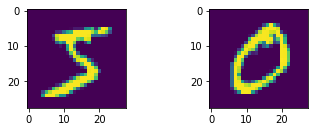

In [19]:
display(2)

In [29]:
pixels = X_train.shape[1] * X_train.shape[2]
X_train.shape, type(X_train), X_train.shape[1] * X_train.shape[2]

((60000, 28, 28), numpy.ndarray, 784)

In [53]:
X_train_c=X_train.copy()
X_test_c=X_test.copy()
y_train_c=y_train.copy()
y_test_c=y_test.copy()
#Reshape From 60k , 28, 28 To 60000 , 786
X_train_c= X_train_c.reshape((X_train.shape[0],pixels))
X_test_c=X_test_c.reshape((X_test.shape[0],pixels))
#Normalize Pixel Value from 0 to 255 to 0 to 1
X_train_c=X_train_c/255
x_test_c=X_test_c/255

#One Hot Encode Output label
y_train_c=tf.keras.utils.to_categorical(y_train_c)
y_test_c=tf.keras.utils.to_categorical(y_test_c)

In [61]:
# Define a FNN ( Forward Neural Network - Of Three Layers ) 
def base_model()->tf.keras.Sequential:
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(pixels,activation='relu',input_dim=pixels),
      tf.keras.layers.Dense(100,activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer= tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.categorical_crossentropy,metrics=["accuracy"])
  return model

In [62]:
#Solving the Problem Using NN ( normal Neural Network)
model = base_model()
model.fit(X_train_c,y_train_c,validation_data=(X_test_c,y_test_c), epochs=10,batch_size=200, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [60]:
#Evaluating a Model 
scores_bm=model.evaluate(X_test_c,y_test_c,verbose=0)
print("Baseline Error ", (100 - scores_bm[1]*100), " %")

Baseline Error  2.3500025272369385  %


Baseline Error Using FNN is -> 2.35 %
Lets try to reduce the same using CNN
Simple CNN For MNIST

In [66]:
#Clonning the data set
X_train_c1= X_train.copy()
X_test_c1= X_test.copy()

y_train_c1=y_train.copy()
y_test_c1=y_test.copy()

# Reshaping based on Convolution
X_train_c1=X_train_c1.reshape((X_train_c1.shape[0],28,28,1))# As it is gray scale image #channel is 1 for color #channels should be 3
X_test_c1=X_test_c1.reshape((X_test_c1.shape[0],28,28,1))

# Norma,ize the ranges 
X_train_c1=X_train_c1/255.0
X_test_c1= X_test_c1/255.0
# One hot encode for label
y_test_c1=tf.keras.utils.to_categorical(y_test_c1)
y_train_c1=tf.keras.utils.to_categorical(y_train_c1)


In [69]:
def base_cnn()->tf.keras.Sequential:
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(500,activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=[tf.keras.metrics.Accuracy()])
  return model

In [ ]:
cnn_model=base_cnn()
predictions=cnn_model.fit(X_train_c1,y_train_c1,validation_data=(X_test_c1,y_test_c1),epochs=10,batch_size=500,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
120/120 [==============================] - 39s 322ms/step - loss: 0.2594 - accuracy: 4.0667e-04 - val_loss: 0.0524 - val_accuracy: 6.1000e-04
Epoch 2/10
120/120 [==============================] - 38s 320ms/step - loss: 0.0538 - accuracy: 0.0022 - val_loss: 0.0394 - val_accuracy: 0.0020
Epoch 3/10
120/120 [==============================] - 38s 320ms/step - loss: 0.0323 - accuracy: 0.0087 - val_loss: 0.0392 - val_accuracy: 0.0098
Epoch 4/10
 76/120 [==================>...........] - ETA: 13s - loss: 0.0250 - accuracy: 0.0144